# Data from other sources - WIP

### Neuromorpho 

Neuromorpho.org is a jsp website.  
Scrape and download using selenium. 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from bs4 import BeautifulSoup as BS
import neuroncollector
import time

In [3]:
# this worked yesterday but it doesn't now.  

scraper = neuroncollector.Scraper(browser="Firefox",machine='ubuntu')

Connected to mongodb://localhost:27017/


In [4]:
scraper.driver.get('http://neuromorpho.org/byspecies.jsp')

In [5]:
scraper.driver.get_screenshot_as_file(filename='sc.png')

True

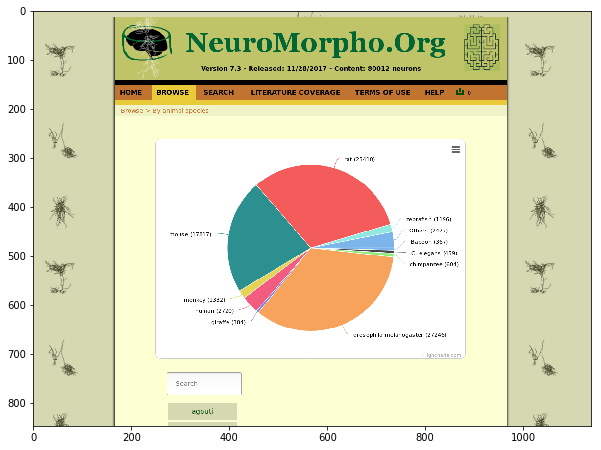

In [6]:
plt.figure(figsize=(10,10))
img=mpimg.imread('sc.png')
imgplot = plt.imshow(img)
plt.show()

In [7]:
species = scraper.driver.find_elements_by_class_name('species')

In [8]:
# Total number of species in neuromorpho database:
len(species)

40

In [201]:
scraper.driver.find_element_by_link_text('mouse')

<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="959beeb6-7e42-984a-b608-e3faefec94e5", element="07047616-ae3e-dd47-88e0-e4578bc906b0")>

In [9]:
# click on species:mouse 
scraper.driver.find_element_by_link_text('mouse').click()

In [10]:
#takes a while for data to load 
time.sleep(30)

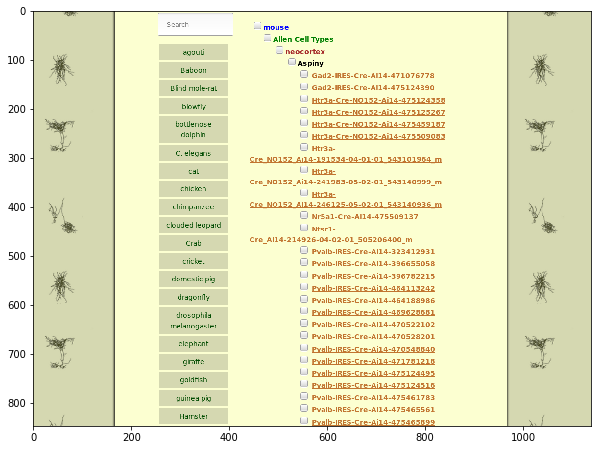

In [11]:
scraper.driver.get_screenshot_as_file(filename='sc.png')
plt.figure(figsize=(10,10))
img=mpimg.imread('sc.png')
imgplot = plt.imshow(img)
plt.show()

In [12]:
# `lvl2` is class name for data source (i.e. the contributors)
lvl2 = scraper.driver.find_elements_by_class_name('lvl2')

In [13]:
len(lvl2)

217

In [14]:
# optionally get the entire page for parsing
page = scraper.driver.page_source

In [15]:
# soupify
soup = BS(page, "html.parser")

In [16]:
# get list of sources
datasources = soup.findAll("font", {"class": "lvl2"})

In [17]:
[a.text for a in datasources]

['Allen Cell Types',
 'Andolina',
 'Anstoetz',
 'Anton',
 'Arenkiel',
 'Ascoli',
 'Bacci',
 'Bacigaluppi',
 'Badea',
 'Baldwin',
 'Ballester-Rosado',
 'Bannatyne',
 'Barco_Scandaglia',
 'Bartos',
 'Bastian',
 'Baulac',
 'Beguin',
 'Bleckert',
 'Brager',
 'Branchereau_Cattaert',
 'Brecha',
 'Briggman',
 'Brumberg',
 'Brunjes',
 'Burdakov',
 'Burkhalter',
 'Caille',
 'Calabresi',
 'Capogna',
 'Caviedes',
 'Chalupa',
 'Chandrashekar',
 'Chen_SK',
 'Cho',
 'Danzer',
 'De Bartolo',
 'De Schutter',
 'DeFelipe',
 'Del Negro',
 'DeMunter',
 'Denk',
 'Diaz',
 'Diniz',
 'Dragich',
 'Duque-Tahvildari',
 'Dusart',
 'Dwyer',
 'Feldmeyer',
 'Fisher',
 'Flores',
 'Frankland',
 'Fricker',
 'Fukunaga',
 'Fulton',
 'Gage',
 'Gartner-Alpar',
 'Gerber',
 'Ginty',
 'Gonzalez-Burgos',
 'Grasselli',
 'Groh',
 'Gupton_Song',
 'Guthrie',
 'Hajos',
 'Halnes',
 'Heistek_Mansvelder',
 'Higgs',
 'Hioki',
 'Huang',
 'Huberman',
 'Huebener',
 'Hwang',
 'Imai',
 'Johnson_T',
 'Jongbloets',
 'Kameda_Kaneko',
 'Kanatso

In [19]:
# `lvl3` is label for brain regions
brain_region = soup.findAll("font", {"class": "lvl3"})

In [20]:
set([a.text for a in brain_region])

{'Not reported',
 'Olfactory Bulb',
 'accessory olfactory bulb',
 'amygdala',
 'anterior olfactory nucleus',
 'basal ganglia',
 'brainstem',
 'cerebellum',
 'dorsal thalamus',
 'entorhinal cortex',
 'hippocampus',
 'hypothalamus',
 'main olfactory bulb',
 'myelencephalon',
 'neocortex',
 'peripheral nervous system',
 'retina',
 'spinal cord',
 'subiculum',
 'thalamus',
 'ventral striatum',
 'ventral thalamus'}

In [21]:
#Neuron cell types!  
cell_types = soup.findAll("font", {"class": "lvl4"})

In [22]:
set([a.text for a in cell_types])  

{'Aspiny',
 'Back-Projecting',
 'Cajal-Retzius',
 'Cannabinoid receptor (CB1R)-positive',
 'Chandelier',
 'Excitatory',
 'Fast-spiking',
 'GABAergic',
 'GAD65-expressing',
 'Golgi',
 'HICAP',
 'HIPP',
 'Induced Neurons',
 'Inhibitory',
 'Lugaro',
 'MOPP',
 'Martinotti',
 'Motoneuron',
 'Muscarinic-responsive',
 'Neuroblast',
 'Neuropeptide Y (NPY)-positive',
 'Non-glutamatergic',
 'Not reported',
 'Oligodendrocyte',
 'Parvalbumin (PV)-positive',
 'Pseudounipolar',
 'Purkinje',
 'Pyramidal-like',
 'Regulator of calcineurin 2 (Rcan2)-postive',
 'Renshaw',
 'Schaffer-collateral associated',
 'Serotonin receptor type 3A (5-HT3)-positive',
 'Somatostatin (SOM) containing cell',
 'Somatostatin (SOM)-positive',
 'Spiny',
 'Total molecular layer projecting',
 'Trilaminar',
 'Vasoactive Intestinal Peptide (VIP)-positive',
 'amacrine',
 'astrocyte',
 'axonless',
 'basket',
 'bipolar',
 'bistratified',
 'bitufted',
 'deep projecting cell',
 'deep short axon',
 'dendritic targeting',
 'dopaminergi

In [23]:
# individual neuron ids
neurons = soup.findAll("a", {"class": "screenshot"})

In [24]:
# Number of neurons
len(neurons)

17817

In [25]:
# For each data source, click on checkbox and download
checkbox = soup.findAll("input", {"id": "mouse_chkbox"})

In [26]:
scraper.driver.find_element_by_name('Sig').click()

In [27]:
scraper.driver.find_element_by_name('Aux').click()

In [28]:
source_name = [a.text for a in datasources]
idnum = 2
print("Clicking on {}".format(source_name[idnum]))
scraper.driver.find_elements_by_id('mouse_chkbox')[idnum].click()

Clicking on 


In [33]:
# Get selected files 
scraper.driver.find_element_by_xpath("//input[@value='Get SWC files of selected neurons']").click()

In [34]:
scraper.driver.window_handles

['2147483649', '2147483655']

In [225]:
time.sleep(15)

In [36]:
scraper.driver.switch_to.window(scraper.driver.window_handles[1])

In [37]:
scraper.driver.find_element_by_name('yes').click()

In [227]:
timer.sleep(10)

In [38]:
scraper.driver.close()

In [46]:
previdnum = idnum
scraper.driver.switch_to.window(scraper.driver.window_handles[0])
idnum = 4
print("Clicking on {}".format(datasources[idnum]))
scraper.driver.find_elements_by_id('mouse_chkbox')[previdnum].click()
scraper.driver.find_elements_by_id('mouse_chkbox')[idnum].click()
# Get selected files 
scraper.driver.find_element_by_xpath("//input[@value='Get SWC files of selected neurons']").click()
time.sleep(2)
scraper.driver.switch_to.window(scraper.driver.window_handles[1])
time.sleep(15)
scraper.driver.find_element_by_name('yes').click()
time.sleep(10)
scraper.driver.close()

Clicking on <font class="lvl2" id="lvl2"><img alt="" height="1" src="images/spacer.gif" width="25"/><input id="mouse_chkbox" onclick="fnClickCheckbox(this)" type="checkbox" value="mouseArenkiel"/>Arenkiel</font>


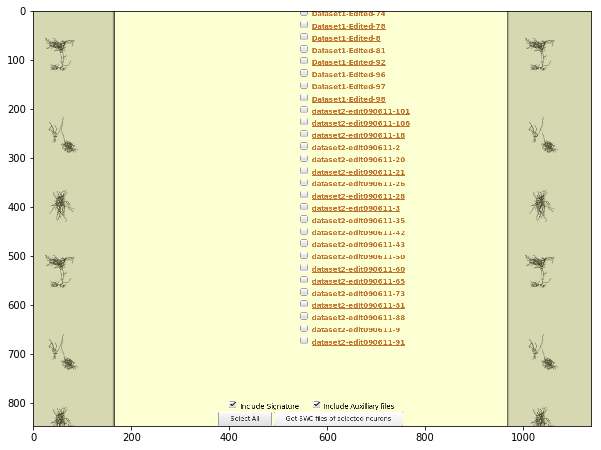

In [41]:
scraper.driver.switch_to.window(scraper.driver.window_handles[0])

scraper.driver.get_screenshot_as_file(filename='sc.png')
plt.figure(figsize=(10,10))
img=mpimg.imread('sc.png')
imgplot = plt.imshow(img)
plt.show()

In [44]:
from selenium import webdriver
profile = webdriver.FirefoxProfile()
profile.set_preference('browser.download.folderList', 2) # custom location
profile.set_preference('browser.download.manager.showWhenStarting', False)
profile.set_preference('browser.download.dir', './tmp')
profile.set_preference('browser.helperApps.neverAsk.saveToDisk', 'application/zip')

In [45]:
ls

analyze_swcfile.py                  phantomjs-2.1.1-linux-x86_64/
Basic data storage and EDA.ipynb    phantomjs-2.1.1-linux-x86_64.tar.bz2
database.py                         __pycache__/
Data from other sources.ipynb       README.md
geckodriver.log                     sc.png
geckodriver-v0.11.1-linux64.tar.gz  screenshot.png
ghostdriver.log                     swc.py
neuroncollector.py                  tmp/
neuroncollector.pyc                 Untitled1.ipynb
notes.md


In [ ]:
# Todo: tidy up and create functions using notebook 